In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
df = pd.read_csv("diabetes.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


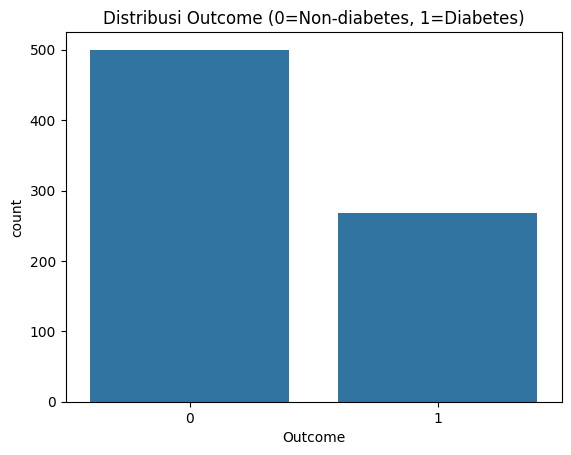

In [ ]:
df.head()
df.info()
df.describe()

sns.countplot(x='Outcome', data=df)
plt.title('Distribusi Outcome (0=Non-diabetes, 1=Diabetes)')
plt.show()

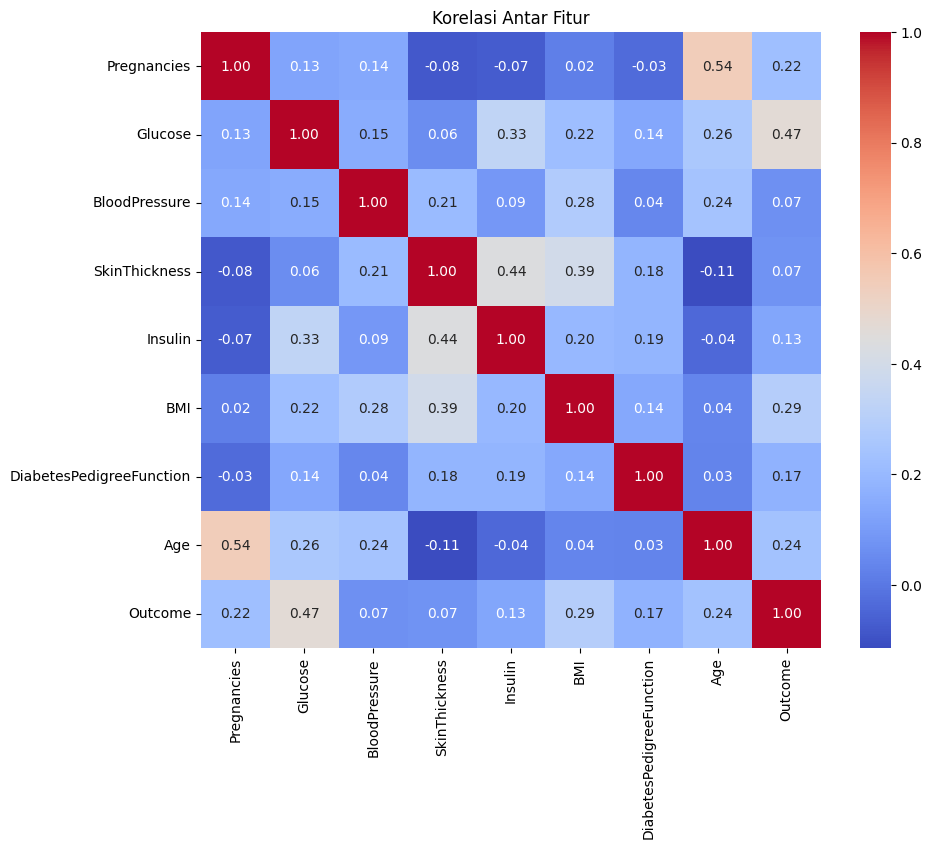

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur')
plt.show()

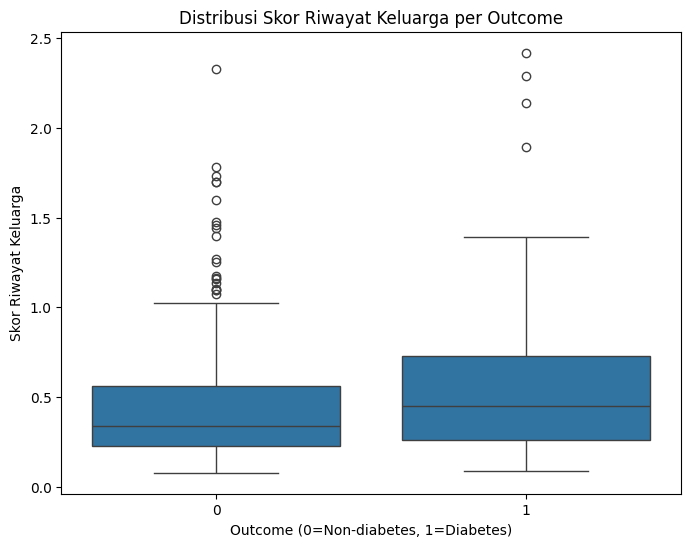

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Outcome', y='DiabetesPedigreeFunction', data=df)
plt.title('Distribusi Skor Riwayat Keluarga per Outcome')
plt.xlabel('Outcome (0=Non-diabetes, 1=Diabetes)')
plt.ylabel('Skor Riwayat Keluarga')
plt.show()

In [ ]:
# Fitur & target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))

# Koefisien fitur
coef_df = pd.DataFrame({
    'Feature': df.columns[:-1],
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nKoefisien Fitur Logistic Regression:")
print(coef_df)

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

ROC-AUC: 0.8146923783287419

Koefisien Fitur Logistic Regression:
                    Feature  Coefficient
1                   Glucose     1.069330
5                       BMI     0.792371
7                       Age     0.430362
6  DiabetesPedigreeFunction     0.227094
0               Pregnancies     0.216242
3             SkinThickness     0.047203
4                   Insulin    -0.198998
2             BloodPressure    -0.258676


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154

ROC-AUC: 0.813406795224977


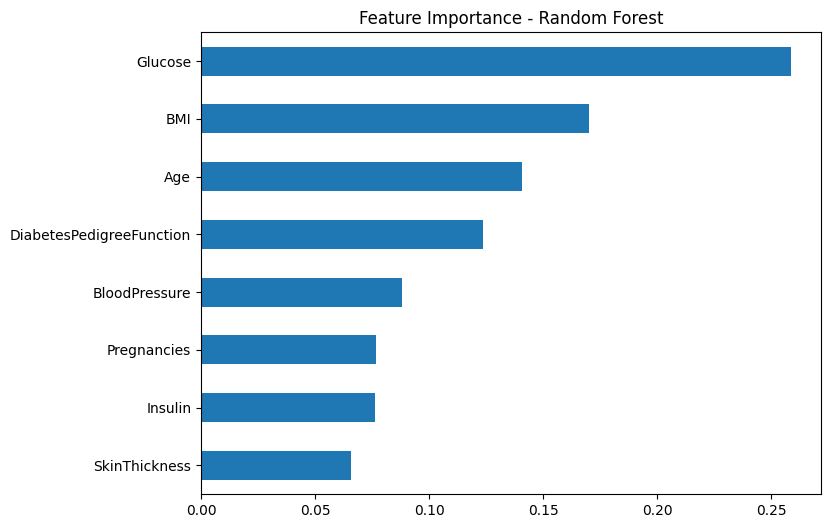

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

# Feature importance plot
importances = pd.Series(rf.feature_importances_, index=df.columns[:-1])
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title('Feature Importance - Random Forest')
plt.show()

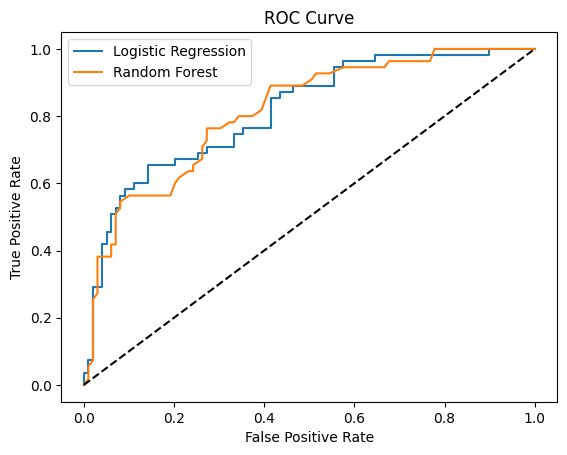

In [ ]:
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression')
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()